In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob2
from scipy import signal 
import seaborn as sns
import os

Function for plotting number of VRILE days as a function of model and forecast month

In [2]:
def VRILE_count_plot(ax_plt,data_plt,reg_sel,TO_PLOT,iplt,v_min,v_max):
    # 
    panel_lett = ['a','b','c','d','e','f']
    #
    pd_plt = pd.pivot_table(data=data_plt,index='model name',columns='valid date month',
                             values=TO_PLOT,aggfunc=np.mean,dropna=False)
    # heatmap
    hmap = sns.heatmap(pd_plt,ax=ax_plt,center=0,vmin=vmin,vmax=vmax,annot=True,linewidth=1.3,annot_kws={"size": 13},
                linecolor='xkcd:gray',cmap='PuOr')#,cbar_ax=cbar_ax)
    #
    ax_plt.set_ylabel('',fontsize=22,rotation=90)
    ax_plt.set_xlabel('Forecast Valid Month',fontsize=20)
    ax_plt.set_xticks(np.arange(0.5,12.5))
    ax_plt.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=18)
    #
    ax_plt.set_title('{i_lett} {model_name}'.format(i_lett=panel_lett[iplt],model_name=reg_sel),fontsize=20)
    ax_plt.collections[0].colorbar.set_label('%',rotation=0,fontsize=18,y=-0.04,labelpad=-20)
    #
    ax_plt.set_yticklabels(hmap.get_ymajorticklabels(),fontsize=18,rotation=0)
    

Load VRILE counts for all models

In [3]:
model_dir_path = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/COMMON_REFORECAST/'
TO_PLOT = 'SIE'
TO_PLOT_str = 'SIE'
seas_str = 'ALL'
thresh_str = '05'
clim_freq = 'WEEKLY'
#
model_week_sel = [0]
lead_week_str = 'Week 0'
lead_week_save_str = '0'
model_load_name = model_dir_path+'VRILE_count_{TO_PLOT}_ALL_MODELS_months{seas_str}_VRILE{thresh_str}_model_clim_freq_{clim_freq}_ALL_LEADS.csv'.format(TO_PLOT=TO_PLOT,
                                                                                                    seas_str=seas_str,thresh_str=thresh_str,clim_freq=clim_freq)
model_VRILE_counts = pd.read_csv(model_load_name)


Load both sets of obs

In [4]:
obs_names_all = ['NSIDC_0079','NSIDC_0051']
obs_VRILE_counts = pd.DataFrame()
for obs_name in obs_names_all:
    obs_load_name = model_dir_path+'VRILE_count_{TO_PLOT}_obs_{obs_name}_months{seas_str}_VRILE{thresh_str}_model_clim_freq_{clim_freq}.csv'.format(TO_PLOT=TO_PLOT,
                                                                                obs_name=obs_name,seas_str=seas_str,thresh_str=thresh_str,clim_freq=clim_freq)
    i_load_obs = pd.read_csv(obs_load_name)
    obs_VRILE_counts = obs_VRILE_counts.append(i_load_obs)
# Rename to make it easier to combine with obs
obs_VRILE_counts = obs_VRILE_counts.rename(columns={'region name':'model name'})

Select desired lead times for model output

In [5]:
model_VRILE_counts_sel = model_VRILE_counts[model_VRILE_counts['lead weeks'].isin(model_week_sel)]

Replace regions with abbreviated names.  Sort so our plots go in a consistent order.

In [6]:
model_VRILE_counts_sel['region'] = model_VRILE_counts_sel['region'].replace({'East Greenland Sea':'E. Greenland Sea',
    'East Siberian-Beaufort-Chukchi Sea':'E. Sib./Beauf./Chuk. Sea'})
obs_VRILE_counts['region'] = obs_VRILE_counts['region'].replace({'East Greenland Sea':'E. Greenland Sea',
    'East Siberian-Beaufort-Chukchi Sea':'E. Sib./Beauf./Chuk. Sea'})
# Replace obs names with useful labels
obs_VRILE_counts['model name'] = obs_VRILE_counts['model name'].replace({'NSIDC_0079':'Bootstrap',
    'NSIDC_0051':'Team'})
# Sort using a Categorical
regions_sort = ["panArctic","Central Arctic","E. Sib./Beauf./Chuk. Sea","Kara-Laptev Sea","Barents Sea","E. Greenland Sea"]
model_VRILE_counts_sel['region sort'] = pd.Categorical(model_VRILE_counts_sel['region'],regions_sort)
obs_VRILE_counts['region sort'] = pd.Categorical(obs_VRILE_counts['region'],regions_sort)


/home/disk/sipn/mcmcgraw/anaconda3/envs/sea_ice_variability_S2S/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/disk/sipn/mcmcgraw/anaconda3/envs/sea_ice_variability_S2S/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Now, for each region, get the number of VRILE days as a function of model and forecast valid month.  Since <code>groupby</code> will silently drop a row or column that is all NaNs (i.e., if no model ever has any VRILEs in a given month), we'll aggregate outside of the plotting function instead. 

/home/disk/sipn/mcmcgraw/anaconda3/envs/sea_ice_variability_S2S/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
/home/disk/sipn/mcmcgraw/anaconda3/envs/sea_ice_variability_S2S/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


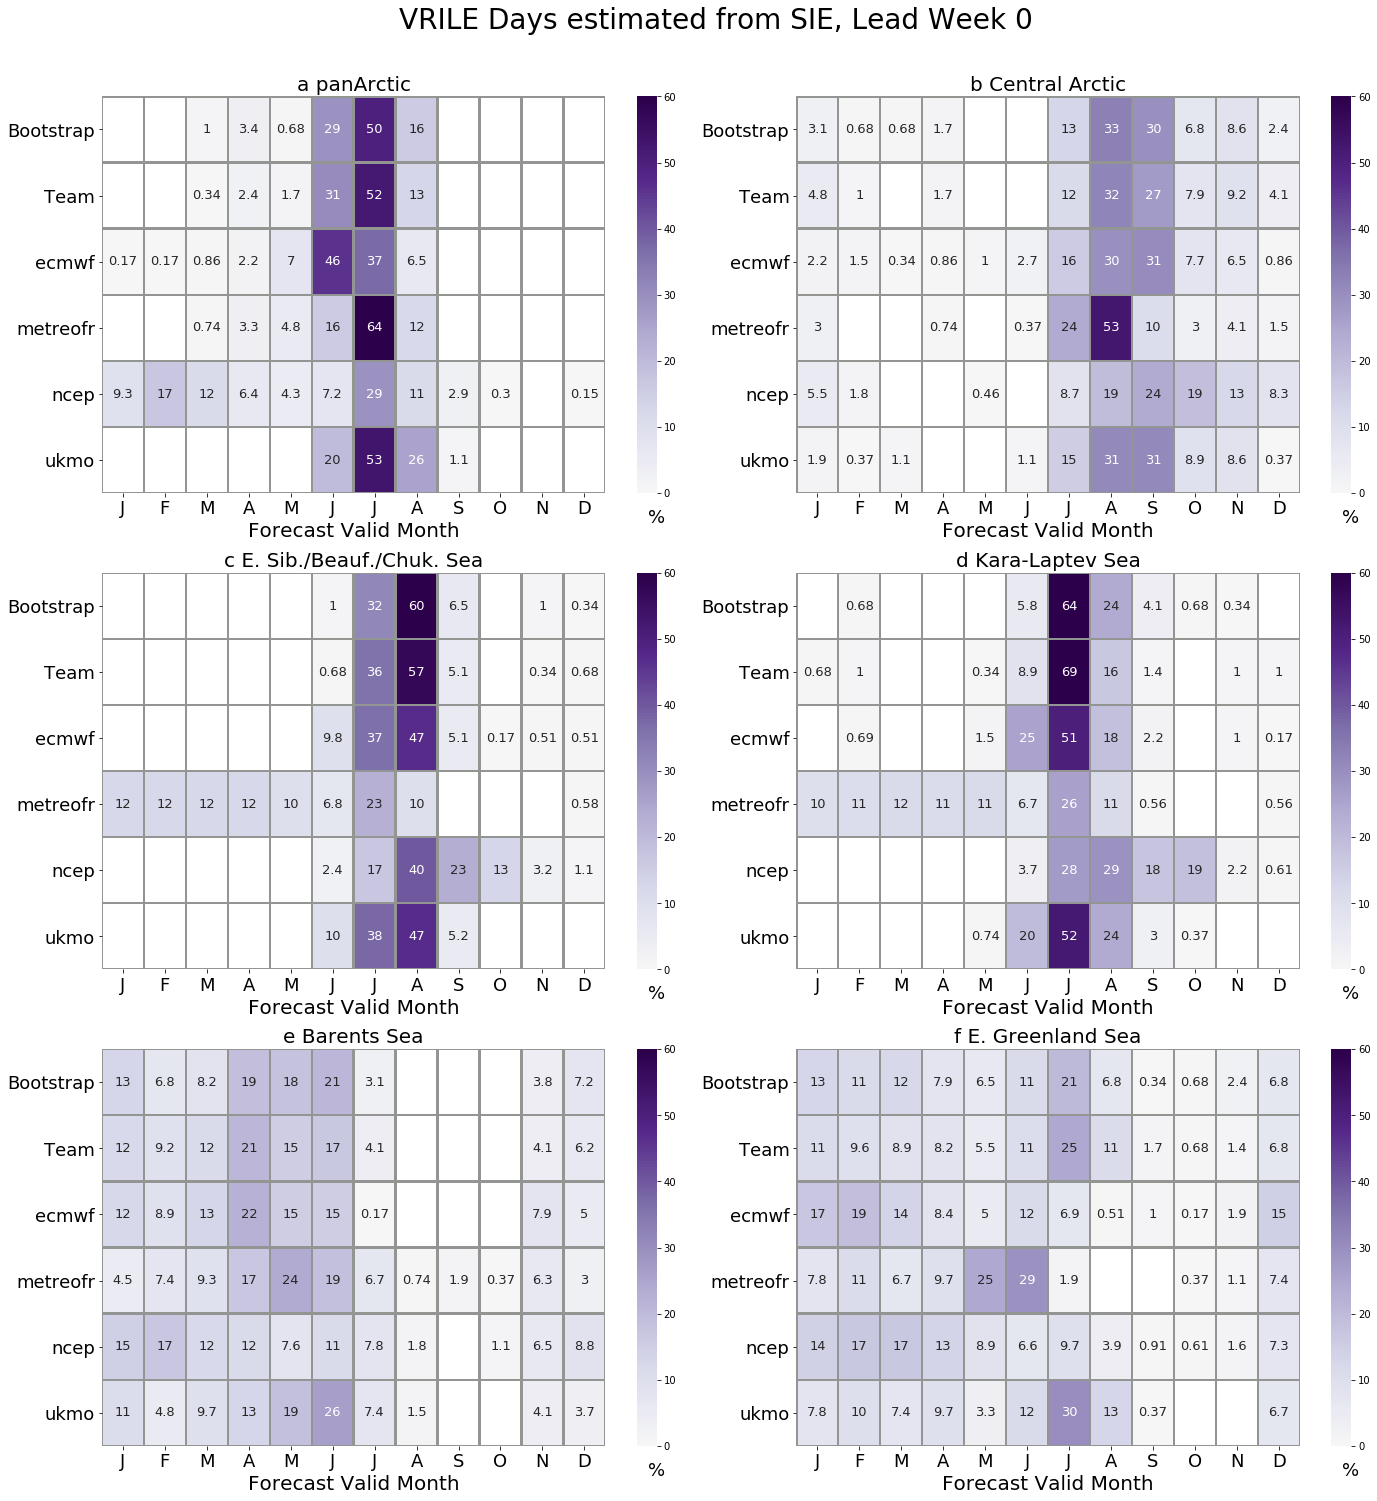

In [7]:
fig1,ax1 = plt.subplots(3,2,figsize=(20,20))
vmin = 0
vmax = 60
show_as_PCT = True
model_counts_gb = model_VRILE_counts_sel.groupby(['region sort','model name','valid date month'])['SIE','SIE anom'].count()
obs_counts_gb = obs_VRILE_counts.groupby(['region sort','model name','valid date month'])['SIE','SIE anom'].count()
#in percent
model_counts_pct = model_counts_gb.divide(model_counts_gb.sum(level=(0,1)))*100
obs_counts_pct = obs_counts_gb.divide(obs_counts_gb.sum(level=(0,1)))*100
for iplt in np.arange(0,len(regions_sort)):
#iplt = 3
    ax_sel = ax1.flat[iplt]
    i_reg_sel = regions_sort[iplt]
    i_model = model_counts_pct.loc[i_reg_sel].reset_index()
    i_obs = obs_counts_pct.loc[i_reg_sel].reset_index()
    i_combo = i_model.append(i_obs)
    VRILE_count_plot(ax_sel,i_combo,i_reg_sel,TO_PLOT_str,iplt,vmin,vmax)
#
fig1.suptitle('VRILE Days estimated from {TO_PLOT_str}, Lead {lead_week_str}'.format(TO_PLOT_str=TO_PLOT_str,lead_week_str=lead_week_str),fontsize=28,y=1.04)
fig1.tight_layout()
fig1_save_dir = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/figures/'
fig1_savename = fig1_save_dir+'VRILE_count_{TO_PLOT}_{seas_str}_VRILE_thresh{thresh_str}_LEAD_WEEKS_{lead_week_save_str}.pdf'.format(TO_PLOT=TO_PLOT,seas_str=seas_str,
                                                                                thresh_str=thresh_str,lead_week_save_str=lead_week_save_str)
fig1.savefig(fig1_savename,format='pdf',bbox_inches='tight')

In [8]:
fig1_savename

'/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/figures/VRILE_count_SIE_ALL_VRILE_thresh05_LEAD_WEEKS_0.pdf'